## Linear Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

print(regressor.score(X_test, Y_test))

0.988169515729126


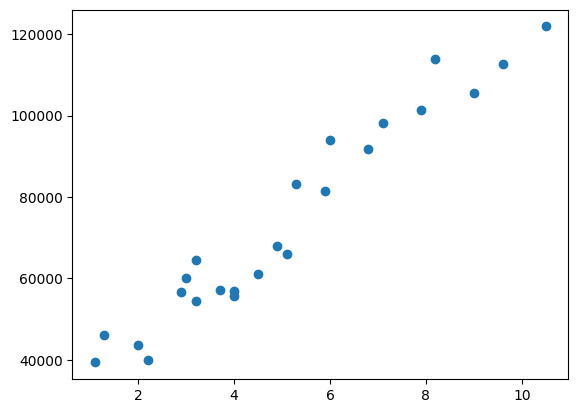

In [26]:
plt.plot(X_train,Y_train, 'o')

Text(0, 0.5, 'Salary')

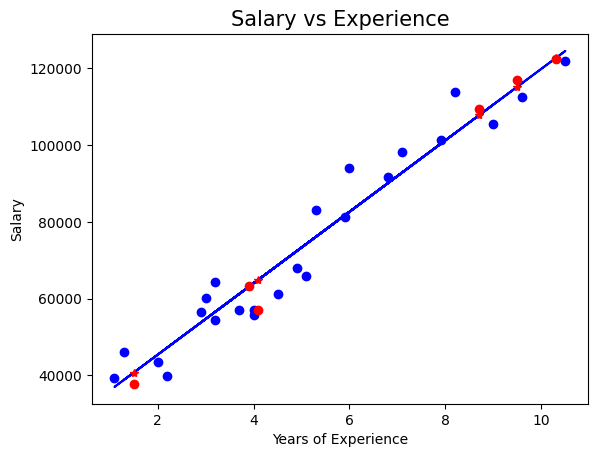

In [46]:
plt.plot(X_train, Y_train, 'o',color='blue')
plt.plot(X_train, regressor.predict(X_train), '-',color='blue')
plt.plot(X_test, Y_test, 'o', color='red')
plt.plot(X_test, y_pred, '*', color='red')

plt.title('Salary vs Experience', fontsize=15)
plt.xlabel('Years of Experience', fontsize=10)
plt.ylabel('Salary', fontsize=10)

In [49]:
coeficiente_angular = regressor.coef_[0]
intercepto = regressor.intercept_

print("Equação de regressão: y = {:.2f}x + {:.2f}".format(coeficiente_angular, intercepto))


Equação de regressão: y = 9312.58x + 26780.10


## Multiple Linear Regression

In [50]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

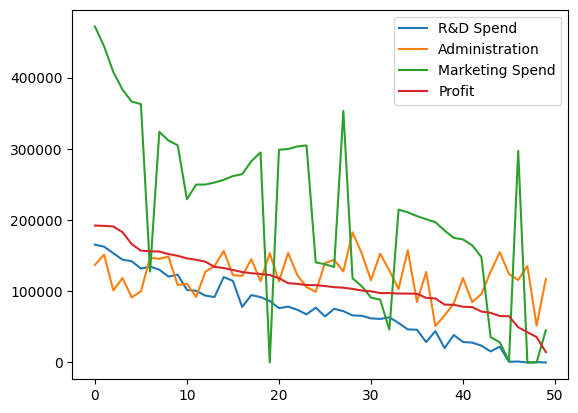

In [71]:
data.plot()

In [54]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder='passthrough')
X = (ct.fit_transform(X))

In [66]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

Y_pred = regressor.predict(X_test)

regressor.score(X_test,Y_test,Y_pred)

0.9730226430807094

In [97]:
pd.DataFrame(Y_pred,np.array(Y_test))

,0
89949.14,88747.295626
108733.99,108285.648281
65200.33,67559.621224
71498.49,71615.547767
42559.73,49467.884932
118474.03,116587.753814
182901.99,170839.495571
99937.59,98588.696041
155752.60,157921.403214
156122.51,157978.706668


In [100]:
coeficiente_angular = regressor.coef_
intercepto = regressor.intercept_

coeficiente_angular,intercepto

(array([ 9.26067074e+02, -6.95256133e+02, -2.30810941e+02,  7.82016508e-01,
         1.77233901e-03,  2.51998588e-02]),
 48301.79544422126)

## Polinomial Regression

In [5]:
data = pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,Y)

LinearRegression()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)

In [26]:
lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_poly,Y)

LinearRegression()

In [28]:
y_predReg = lin_reg.predict(X)
y_predPoly = lin_reg_2.predict(X_poly)


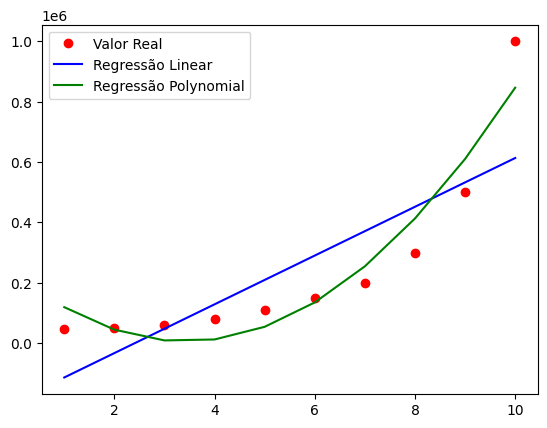

In [42]:
plt.plot(X,Y,'ro', label = 'Valor Real')
plt.legend()
plt.plot(X,y_predReg,'b', label= 'Regressão Linear')
plt.legend()
plt.plot(X,y_predPoly, 'g', label= 'Regressão Polynomial')
plt.legend()
plt.show()

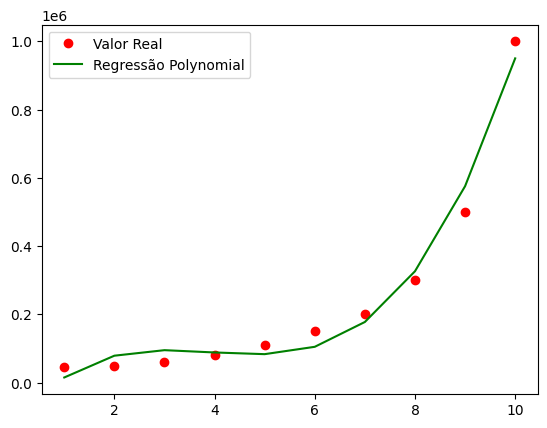

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)
plt.plot(X,Y,'ro', label = 'Valor Real')
plt.legend()
plt.plot(X,lin_reg_2.predict(X_poly), 'g', label= 'Regressão Polynomial')
plt.legend()

## Support Vector Regression

In [150]:
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values

In [151]:
X = X.reshape(-1, 1)

In [152]:
Y= Y.reshape(-1, 1)

In [153]:
from sklearn.preprocessing import StandardScaler

stand_x = StandardScaler()
stand_y = StandardScaler()

X = stand_x.fit_transform(X)
Y = stand_y.fit_transform(Y)

In [186]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,Y)

/home/erikson/Documentos/ufmg/2023-1/PFC 1/machine learning/curso/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [187]:
y_pred = regressor.predict(X)

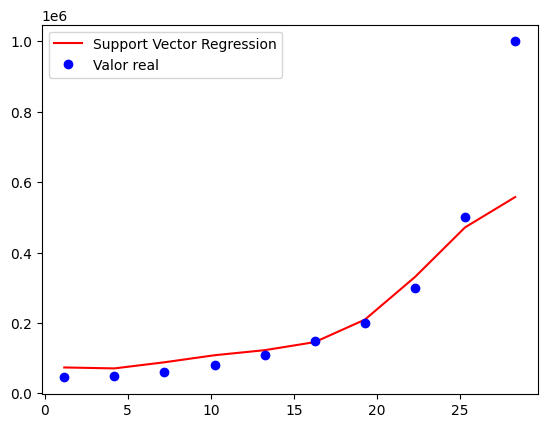

In [188]:
plt.plot(stand_x.inverse_transform(X),stand_y.inverse_transform(y_pred.reshape(-1,1)),'r',label='Support Vector Regression')
plt.legend()
plt.plot(stand_x.inverse_transform(X), stand_y.inverse_transform(Y),'ob',label='Valor real')
plt.legend()
